 Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


Set Image Directories

In [2]:
train_dir = 'C:/Users/Dell/Downloads/archive/train'
test_dir = 'C:/Users/Dell/Downloads/archive/test'


Image Preprocessing Function

In [3]:
def preprocess_image(image_path, image_size=(48, 48)):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, image_size)
    normalized_image = resized_image.astype('float32') / 255.0
    return normalized_image


Load Images and Labels from Directory

In [4]:
def load_images_from_directory(directory, image_size=(48, 48)):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(directory)):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)
                if image_path.endswith(('.jpg', '.jpeg', '.png')):
                    processed_image = preprocess_image(image_path, image_size)
                    images.append(processed_image)
                    labels.append(label)
    return np.array(images), np.array(labels)


Load and Preprocess Dataset

In [5]:
X_train, y_train = load_images_from_directory(train_dir)
X_test, y_test = load_images_from_directory(test_dir)

# Reshape images to add channel dimension
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shape info
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (21005, 48, 48, 1), y_train shape: (21005, 4)
X_test shape: (5212, 48, 48, 1), y_test shape: (5212, 4)


Build CNN Model

In [6]:
from keras.layers import Input

model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,660 (3.20 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 105s 295ms/step - accuracy: 0.3497 - loss: 1.3439 - val_accuracy: 0.4889 - val_loss: 1.1754
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 47s 143ms/step - accuracy: 0.4807 - loss: 1.1759 - val_accuracy: 0.5497 - val_loss: 1.0862
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 71s 107ms/step - accuracy: 0.5263 - loss: 1.0934 - val_accuracy: 0.5591 - val_loss: 1.0266
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.5514 - loss: 1.0287 - val_accuracy: 0.5664 - val_loss: 1.0123
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.5718 - loss: 0.9938 - val_accuracy: 0.5812 - val_loss: 0.9702
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.5918 - loss: 0.9554 - val_accuracy: 0.5854 - val_loss: 0.9594
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 85s 143ms/step - accuracy: 0.6142 - loss: 0.9102 - val_accuracy: 0.5908 - val_loss: 0.9464
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.6267 - loss: 0

Plot Training History/ Model Evaluation

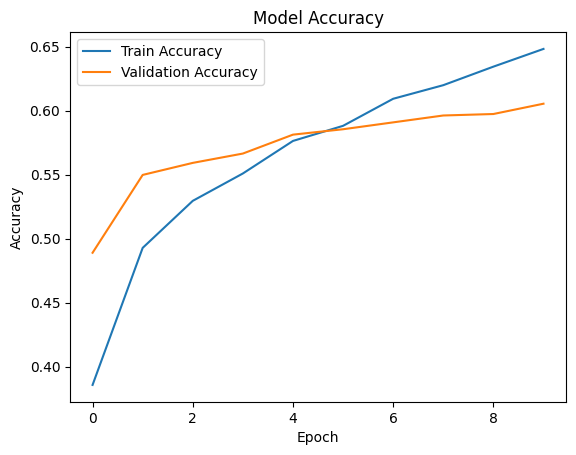

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


confusion matrix and  report

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       958
           1       0.74      0.80      0.77      1774
           2       0.54      0.58      0.56      1233
           3       0.52      0.44      0.48      1247

    accuracy                           0.61      5212
   macro avg       0.58      0.58      0.58      5212
weighted avg       0.60      0.61      0.60      5212

[[ 472  139  170  177]
 [ 106 1422  132  114]
 [ 125  174  713  221]
 [ 207  175  317  548]]


 Hyperparameter Tuning

In [10]:
# change these and retrain
epochs = 20
batch_size = 128
dropout_rate = 0.3
optimizer = 'adam'


Save the Model

In [11]:
model.save("emotion_detection_model.keras")


Real-Time Emotion Detection with OpenCV

In [ ]:
emotion_labels = os.listdir(train_dir)

model = tf.keras.models.load_model("emotion_detection_model.keras")

def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = roi_normalized.reshape(1, 48, 48, 1)
        prediction = model.predict(roi_reshaped)
        emotion = emotion_labels[np.argmax(prediction)]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    return frame

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = detect_emotion(frame)
    cv2.imshow('Facial Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


